# Recurrent Neural Networks (LSTM)

Notebook ini berdasarkan kursus __Deep Learning A-Z™: Hands-On Artificial Neural Networks__ di Udemy. [Lihat kursus](https://www.udemy.com/deeplearning/).

## Informasi Notebook

- __notebook name__: `taruma_udemy_rnn_1_0_0`
- __notebook version/date__: `1.0.0`/`20190719`
- __notebook server__: Google Colab
- __python version__: `3.7`
- __keras version__: `2.2.4`

## STEP 0: SETUP

In [39]:
# DESKRIPSI PROYEK
NOTEBOOK_TITLE = 'taruma_udemy_rnn'
NOTEBOOK_VERSION = '1.0.0'
NOTEBOOK_NAME = "{}_{}".format(NOTEBOOK_TITLE, NOTEBOOK_VERSION.replace('.','_'))
print(f"NOTEBOOK_NAME = {NOTEBOOK_NAME}")

NOTEBOOK_NAME = taruma_udemy_rnn_1_0_0


In [1]:
# MEMERIKSA VERSI PADA SISTEM
import sys
import keras
print("python version: {}".format(sys.version))
print("keras version: {}".format(keras.__version__))

Using TensorFlow backend.


python version: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
keras version: 2.2.4


In [0]:
# MENGGUNAKAN DATAFRAME INTERAKTIF
%load_ext google.colab.data_table

In [3]:
# MENGHUBUNGKAN DENGAN GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/gdrive')
DROP_DRIVE = '/content/gdrive/My Drive/Colab Notebooks/_dropbox'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
# AMBIL DATASET
!wget -O superdatascience_rnn_udemy.zip "https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Recurrent-Neural-Networks.zip"
!unzip superdatascience_rnn_udemy.zip

--2019-07-19 04:01:09--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Recurrent-Neural-Networks.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.88.40
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.88.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24237 (24K) [application/zip]
Saving to: ‘superdatascience_rnn_udemy.zip’

superdatascience_rn 100%[===================>]  23.67K  --.-KB/s    in 0.03s   

2019-07-19 04:01:09 (860 KB/s) - ‘superdatascience_rnn_udemy.zip’ saved [24237/24237]

Archive:  superdatascience_rnn_udemy.zip
   creating: Recurrent_Neural_Networks/
  inflating: Recurrent_Neural_Networks/Google_Stock_Price_Test.csv  
  inflating: Recurrent_Neural_Networks/Google_Stock_Price_Train.csv  
  inflating: Recurrent_Neural_Networks/rnn.py  


In [5]:
# MENENTUKAN DATASET PATH
DROP_DIRECTORY = 'Recurrent_Neural_Networks'
FILE_TRAIN = 'Google_Stock_Price_Train.csv'
FILE_TEST = 'Google_Stock_Price_Test.csv'

path_train = "{}/{}".format(DROP_DIRECTORY, FILE_TRAIN)
path_test = "{}/{}".format(DROP_DIRECTORY, FILE_TEST)
print(f'Training dataset: {path_train}')
print(f'Test dataset: {path_test}')

Training dataset: Recurrent_Neural_Networks/Google_Stock_Price_Train.csv
Test dataset: Recurrent_Neural_Networks/Google_Stock_Price_Test.csv


## STEP 1: IMPORT LIBRARIES

In [0]:
# IMPORT THE LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## STEP 2: IMPORT DATASET

In [7]:
# IMPORT TRAINING SET
dataset_train = pd.read_csv(path_train)
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [8]:
training_set = dataset_train.iloc[:, 1:2].values # 1:2 to create numpy array not simple vector
print(f'training_set.shape = {training_set.shape}')
training_set

training_set.shape = (1258, 1)


array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

## STEP 3: FEATURE SCALING

In [9]:
# FEATURE SCALING
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## STEP 4: TIMESTEPS DATA

In [10]:
# CREATING A DATA STRUCTURE WITH 60 TIMESTEPS AND 1 OUTPUT
X_train = []
y_train = []

N_TIMESTEPS = 60
COLUMN = 0
row = training_set.shape[0] # 1258

for i in range(N_TIMESTEPS, row):
    X_train.append(training_set_scaled[i-N_TIMESTEPS:i, COLUMN])
    y_train.append(training_set_scaled[i, COLUMN])
    
X_train, y_train = np.array(X_train), np.array(y_train)
print(f"X_train.shape = {X_train.shape}")
print(X_train)
print(f"y_train.shape = {y_train.shape}")
print(y_train)

X_train.shape = (1198, 60)
[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
y_train.shape = (1198,)
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


## STEP 5: RESHAPING

Dimensi training set harus disesuaikan dengan _input_ yang diperlukan oleh RNN.

In [11]:
# RESHAPING
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(f"X_train.shape = {X_train.shape}")

X_train.shape = (1198, 60, 1)


## STEP 6-10: BUILDING RNN (LSTM)

In [0]:
# IMPORT LIBRARIES
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [13]:
# INITIALIZING THE RNN
regressor = Sequential()

W0719 04:01:12.744422 140507203794816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [14]:
# ADDING THE FIRST LSTM LAYER AND SOME DROPOUT REGULARISATION
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

W0719 04:01:12.796168 140507203794816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 04:01:12.810938 140507203794816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 04:01:13.069632 140507203794816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 04:01:13.081120 140507203794816 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Ins

In [0]:
# ADDDING A SECOND LAYERS
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

In [0]:
# ADDDING A THIRD LAYERS
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

In [0]:
# ADDING A FOURTH/LAST LAYERS
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(rate=0.2))

In [0]:
# ADDING THE OUTPUT LAYERS
regressor.add(Dense(units=1))

In [20]:
# COMPILE THE RNN
# Choosing optimizer = https://keras.io/optimizers/
# Choosing losses = https://keras.io/losses/
regressor.compile(optimizer='adam', loss='mean_squared_error')

W0719 04:05:01.658027 140507203794816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [23]:
# SUMMARY MODEL
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

## STEP 11: FITTING

In [24]:
# FITTING RNN
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

W0719 04:10:12.356407 140507203794816 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0719 04:10:14.993341 140507203794816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0471
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0054
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - l

In [41]:
# SIMPAN MODEL
final_model = regressor

# Save model object
save_model = DROP_DRIVE + '/{}.h5'.format(NOTEBOOK_NAME)
final_model.save(save_model)
print('MODEL: {}'.format(save_model))

# Save Model in JSON
save_model_json = DROP_DRIVE + '/{}.json'.format(NOTEBOOK_NAME)
with open(save_model_json, 'w') as json_file:
    json_file.write(final_model.to_json())
print('MODEL JSON: {}'.format(save_model_json))

# Save Weights of model
save_weight_model = DROP_DRIVE + '/{}_weights.h5'.format(NOTEBOOK_NAME)
final_model.save_weights(save_weight_model)
print('MODEL WEIGHTS: {}'.format(save_weight_model))

MODEL: /content/gdrive/My Drive/Colab Notebooks/_dropbox/taruma_udemy_rnn_1_0_0.h5
MODEL JSON: /content/gdrive/My Drive/Colab Notebooks/_dropbox/taruma_udemy_rnn_1_0_0.json
MODEL WEIGHTS: /content/gdrive/My Drive/Colab Notebooks/_dropbox/taruma_udemy_rnn_1_0_0_weights.h5


## STEP 12-13: TEST DATA PREPARATION

In [52]:
# IMPORT TEST SET
dataset_test = pd.read_csv(path_test)
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


real_stock_price.shape = (20, 1)


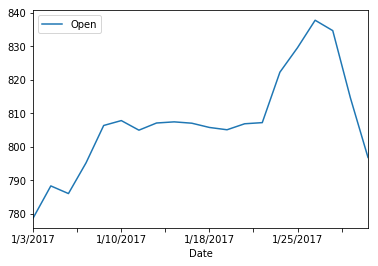

In [53]:
print(f"real_stock_price.shape = {real_stock_price.shape}")
dataset_test.plot(x='Date', y='Open');

In [59]:
# GETTING THE PREDICTED STOCK PRICE OF 2017
# concate data
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
index_inputs = len(dataset_total) - len(dataset_test) - N_TIMESTEPS
inputs = dataset_total[index_inputs:].values
print(f"inputs.shape = {inputs.shape}")
print(inputs)

inputs.shape = (80,)
[779.   779.66 777.71 786.66 783.76 781.22 781.65 779.8  787.85 798.24
 803.3  795.   804.9  816.68 806.34 801.   808.35 795.47 782.89 778.2
 767.25 750.66 774.5  783.4  779.94 791.17 756.54 755.6  746.97 755.2
 766.92 771.37 762.61 772.63 767.73 764.26 760.   771.53 770.07 757.44
 744.59 757.71 764.73 761.   772.48 780.   785.04 793.9  797.4  797.34
 800.4  790.22 796.76 795.84 792.36 790.9  790.68 793.7  783.33 782.75
 778.81 788.36 786.08 795.26 806.4  807.86 805.   807.14 807.48 807.08
 805.81 805.12 806.91 807.25 822.3  829.62 837.81 834.71 814.66 796.86]


In [62]:
# RESHAPE TO 2D TENSOR
inputs = inputs.reshape(-1, 1)
print(f"inputs.shape = {inputs.shape}")
print(inputs[:5, 0])
# SCALING
inputs = sc.transform(inputs)
print(inputs[:5, 0])

inputs.shape = (80, 1)
[779.   779.66 777.71 786.66 783.76]
[0.9299055  0.93113327 0.92750577 0.94415507 0.93876032]


## STEP 14:  RESHAPE & PREDICT

In [72]:
# RESHAPE TO 3D TENSOR
X_test = []
row, _ = inputs.shape

COLUMN = 0

for i in range(N_TIMESTEPS, row):
    X_test.append(inputs[i-N_TIMESTEPS:i, COLUMN])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(f"X_test.shape = {X_test.shape}")

X_test.shape = (20, 60, 1)


In [78]:
# PREDICT RESUTLS
predicted_stock_price = regressor.predict(X_test)
print(f"predicted_stock_price.shape = {predicted_stock_price.shape}")
predicted_stock_price

predicted_stock_price.shape = (20, 1)


array([[0.91844916],
       [0.9130335 ],
       [0.91380346],
       [0.9169444 ],
       [0.9239223 ],
       [0.93602014],
       [0.9469634 ],
       [0.95109427],
       [0.95119   ],
       [0.95003784],
       [0.948879  ],
       [0.94773245],
       [0.9468689 ],
       [0.9476577 ],
       [0.9495323 ],
       [0.95906746],
       [0.97342193],
       [0.98860407],
       [0.99643517],
       [0.98702157]], dtype=float32)

In [79]:
# INVERSE SCALING
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[772.8415 ],
       [769.93024],
       [770.3442 ],
       [772.0326 ],
       [775.7836 ],
       [782.287  ],
       [788.1696 ],
       [790.3902 ],
       [790.44165],
       [789.8223 ],
       [789.1994 ],
       [788.583  ],
       [788.11884],
       [788.54285],
       [789.55054],
       [794.6763 ],
       [802.39264],
       [810.55396],
       [814.7637 ],
       [809.7033 ]], dtype=float32)

## STEP 15: VISUALIZATION

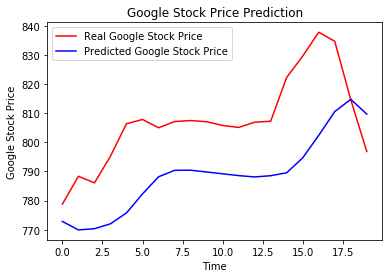

In [80]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show();

# Changelog

```
- 20190719 - 1.0.0 - Initial
```